## Artificial Intelligence
## 464
## Project #7

## Before You Begin...
1. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
2. Read the entire notebook before beginning your work, and
3. Check the submission deadline on Gradescope.

## General Directions for this Assignment

1. Output format should be exactly as requested,
2. Functions should do only one thing,
3. Keep functions to 20 lines or less (empty lines are fine, there's leeway, but don't blatantly ignore this),
4. Add docstring to all functions

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel" -> "Restart & Run All". The first cell that is run should show 1, the second should show 2, and so on...
3. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
4. Do not submit any other files.

# Part 1, ISOMAP: What is it?

### Isomap (short for isometric mapping) is a non-linear dimensionality reduction method. That may sound complicated, but we can break this down.

#### Dimensionality reduction

Dimensionality reduction is a technique used in machine learning to find ways to represent data in lower dimensions (with less features) while preserving as much information as possible about what makes each sample point in the data unique. 

For example, consider a 3-dimensional figure (like a box/cube). While this is a 3D figure, we can unfold it to get the "net" for the object. We still recognize where sides connect and the shapes and sizes of each face. As a result, we can still tell all the same information about the shape, even when it's represented using its net in 2D. Because we represented a 3D shape in 2D and preserved all of the information, this is an example of dimensionality reduction.

Something specific about Isomap is that instead of trying to preserve information by directly recording how an entry in the dataset is different from the "typical" entry in the data (or how strongly its features differ from what is expected), Isomap preserves information by preserving how different each entry is to its *closest* matches within the data.

#### Nonlinearity

Isomap being *nonlinear* means that we aren't assuming that the data is embedded in a linear plane. When it is, there are less geometric constraints we have to try to account for. We are understanding that the data may be distributed across a 3D spiral, a bell curve, or any other non-linear shape. This means that we can't just "cut" through it to determine what data is different from others. For example, with a spiral, we would want to be able to unfold it. When folded, elements that seem near each other but are on different layers of the fold may actually be very far apart. We want to be able to understand what geometry our data is actually represented in so that we can tell what data is closer or further apart more accurately.

Additionally, you may have heard of PCA (principal component analysis) being used as a machine learning tool before. PCA is a linear dimensionality reduction method, meaning that while it does aim to preserve information within a dataset while representing it in lower dimensions, it still does assume that data is distributed linearly (i.e., across a flat plane).

Read more on the algorithm here: https://www.digitalocean.com/community/tutorials/dimension-reduction-with-isomap

## Now that the background is out of the way, we can move on to try creating our own implementation of ISOMAP.

The procedure is actually not that complicated. While mathematical in nature, it's decently digestible with just a little bit of linear algebra and algorithm knowledge.

1. Determine the nearest neighbors of each point. You can do this using a simple KNN (k-nearest neighbors) model, where for each point, you determine what the closest K points to each point in the data is.
   
2. Construct a graph representing the neighborhood. Connect each point to each other if it is a K-nearest neighbor, and use the Euclidean distance between each point as the edge length between connected points.

   
3. Find the shortest path between each node. You can use Dijkstra's algorithm for this. Because we determined neighbors that are close enough for the nonlinearity of the data distribution to not affect them, we can now find shortest paths between points normally.

   
5. Compute a lower dimensional scaling. This can be somewhat linear algebra intensive, but in essence, this is an eigenvalue decomposition of the matrix containing the sample points. The matrix is then centered (the mean is subtracted from each column), and the eigenvectors corresponding to the largest eigenvalues (which end up being the best representative eigenvectors) are used to find a representation of the data with lower dimensionality. Don't worry if this sounds too complicated, the implementation will be partially completed for you.

Read more on the specific algorithm steps: https://en.wikipedia.org/wiki/Isomap

## Now that we have the steps, start with some imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D visualization
import matplotlib.patches as mpatches
from sklearn.neighbors import NearestNeighbors # For finding the nearest neighbors to each entry in the data
from scipy.sparse import csr_matrix # For forming the neighborhood graph
from scipy.sparse.csgraph import shortest_path # For finding the shortest path

# For testing the isomap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA # For comparison

Now onto writing the functions to perform each step. Feel free to make any changes to the functions if they fit better with how you are implementing the algorithm.

## Step 1: Finding the nearest neighbors to each entry in the data

In [2]:
def get_nearest_neighbors(X, n_neighbors=5):
    """
    Find K nearest neighbors for each point and returns the distances and indices of the nearest neighbors for each entry in the data.

    Args:
        X: data matrix (n_samples x n_features)
        n_neighbors: number of neighbors

    Returns:
        (distance, indices): distance and index for each entry in the data
    """

    nbrs = NearestNeighbors(n_neighbors=n_neighbors)
    
    # TODO: Fit the data to the Nearest Neighbors model.
    # Then, get the distances and incides of nearest neighbors for each sample,
    # and return them.

    return distances, indices

## Step 2: Creating the graph of neighbors for each entry in the data

In [3]:
def build_neighbor_graph(distances, indices, n_samples):
    """
    Build a sparse nearest-neighbor graph from distance and index information.

    Args:
        distances (np.ndarray): Array of shape (n_samples, n_neighbors) containing distances to nearest neighbors.
        indices (np.ndarray): Array of shape (n_samples, n_neighbors) containing indices of nearest neighbors.
        n_samples (int): Total number of samples (nodes).

    Returns:
        csr_matrix: Sparse matrix representing the neighbor graph, 
                    where entry (i, j) holds the distance between sample i and its neighbor j.
    """

    # repeat each sample 'n_neighbors' times to make the row indices
    # TODO
    # rows =

    # flatten neighbor indices and distances to use as column indices and edge weights respectively
    # TODO
    # cols = 
    # data =

    # create a sparse matrix (graph) where (row, col) pairs are connected with edge weight = distance
    graph = csr_matrix((data, (rows, cols)), shape=(n_samples, n_samples))
    return graph

# Step 3: Shortest Path Between Distances

In [4]:
def compute_shortest_paths(graph):
    """
    Compute geodesic (shortest path) distances between points.

    Args:
        graph: sparse neighbor graph

    Returns:
        distance_matrix: matrix of shortest-path distances
    """
    # TODO: Return the shortest paths between each neighbor for each node in the graph
    # HINT: You can do this in one line using one of the imports from the beginning of the notebook.
    pass

## Step 4: Multidimensional Scaling

In [5]:
def classical_mds(distance_matrix, n_components=2):
    """
    Apply Classical Multidimensional Scaling (MDS).

    Args:
        distance_matrix: shortest-path distance matrix
        n_components: output dimensionality

    Returns:
        embedding: low-dimensional representation (n_samples x n_components)
    """
    # Multidimensional scaling (mostly implemented for you)
    n_samples = distance_matrix.shape[0]
    H = np.eye(n_samples) - np.ones((n_samples, n_samples)) / n_samples
    K = -0.5 * H @ (distance_matrix ** 2) @ H
    eigvals, eigvecs = np.linalg.eigh(K)

    # TODO: Get the indices of the most representative eigenvectors based on the largest eigenvector.
    # Then, get the components and eigenvalues (lambdas) based on selecting the "n_components" most significant of the
    # chosen eigenvectors and eigenvalues. Return the components times the eigenvalues (lambdas).
    
    return components * lambdas

## Step 5: Put together the cohesive Isomap function (done for you, but you may append freely)

In [6]:
def isomap(X, n_neighbors=5, n_components=2):
    """
    Full Isomap pipeline.

    Args:
        X: input data (n_samples x n_features)
        n_neighbors: neighbors for graph
        n_components: dimension of embedding

    Returns:
        X_reduced: low-dimensional data
    """
    distances, indices = get_nearest_neighbors(X, n_neighbors)
    n_samples = X.shape[0]
    graph = build_neighbor_graph(distances, indices, n_samples)
    distances = compute_shortest_paths(graph)

    # OPTIONAL: Handle infinite distances (you can replace them with large numbers or drop them from the graph).
    # If you do do this, do this before the multidimensional scaling.

    X_reduced = classical_mds(distances, n_components)

    # OPTIONAL: Handle NaNs after MDS.
    
    return X_reduced

# SOLUTION FUNCTIONS

In [7]:
def get_nearest_neighbors(X, n_neighbors=5):
    """
    Fits NearestNeighbors and returns distances and indices of nearest neighbors.

    4 Lines
    """
    nbrs = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs.fit(X) # fit the model on dataset X

    # gets the distances and incides of nearest neighbors for each sample
    distances, indices = nbrs.kneighbors(X)
    return distances, indices

def build_neighbor_graph(distances, indices, n_samples):
    """
    Builds a sparse graph (CSR matrix) from distances and neighbor indices.
    """

    # repeat each sample 'n_neighbors' times to make the row indices
    rows = np.repeat(np.arange(n_samples), indices.shape[1])

    # flatten neighbor indices and distances to use as column indices and edge weights respectively
    cols = indices.flatten()
    data = distances.flatten()

    # create a sparse matrix (graph) where (row, col) pairs are connected with edge weight = distance
    graph = csr_matrix((data, (rows, cols)), shape=(n_samples, n_samples))
    return graph

def compute_shortest_paths(graph):
    return shortest_path(graph, method='D', directed=False)


def classical_mds(distance_matrix, n_components=2):
    n_samples = distance_matrix.shape[0]
    H = np.eye(n_samples) - np.ones((n_samples, n_samples)) / n_samples
    K = -0.5 * H @ (distance_matrix ** 2) @ H
    eigvals, eigvecs = np.linalg.eigh(K)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    components = eigvecs[:, :n_components]
    lambdas = np.sqrt(eigvals[:n_components])
    return components * lambdas


def isomap(X, n_neighbors=5, n_components=2):
    distances, indices = get_nearest_neighbors(X, n_neighbors)
    n_samples = X.shape[0]
    graph = build_neighbor_graph(distances, indices, n_samples)
    distances = compute_shortest_paths(graph)
    
    # Handle infinite distances
    if np.isinf(distances).any():
        print("[Warning] Graph disconnected. Some distances are infinite.")
        # Replace infinities with large numbers (optional), or drop bad rows
        max_dist = np.nanmax(distances[~np.isinf(distances)])
        distances[np.isinf(distances)] = max_dist * 2  # Large but finite
    
    X_reduced = classical_mds(distances, n_components)
    
    # Handle NaNs after MDS
    if np.isnan(X_reduced).any():
        print("[Warning] NaNs detected in embedding. Removing bad points.")
        mask = ~np.isnan(X_reduced).any(axis=1)
        X_reduced = X_reduced[mask]
    
    return X_reduced



# Part 2: Applying Isomap to data (Digits/MNIST dataset)

Now that you've written the code for Isomap, we're going to test on it on dataset of handwritten digits from 0-9. To start, we'll just try to differentiate between two numbers, rather than all of them.

### TODO:

Pick 2 numbers that you think will be easy for the model to differentiate between based on how they look when they are written. Justify your reasoning, and put these numbers into the mask defined below. Additionally, state two numbers that you think would not be as easy to differentiate between, and explain why.

### Sample solution answer:
2 and 9 would be easy to differentiate between because the bottom half of their shapes differ strongly. The 9 curves downwards from the top right to the bottom left, but the two has a slash and then goes from the bottom left to the bottom right. Numbers that would be more difficult would be 1 and 7. A slanted 1 can easily look like a 7, and this could happen a lot in particular handwriting styles.

In [8]:
# STUDENTS PICK THESE FOR THEMSELVES
num1 = 2
num2 = 9

### DO NOT CHANGE: Running your Isomap on the data. This is set up to only consider the two numbers you picked.

In [9]:
# Load digits data
digits = load_digits()
X = digits.data
y = digits.target
mask = (y == num1) | (y == num2)
X = X[mask]
y = y[mask]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_reduced = isomap(X_train, n_neighbors=8, n_components=2) # Fit MyIsomap on training data
X_train_reduced = X_train_reduced[~np.isnan(X_train_reduced).any(axis=1)] # Drop NaN values
y_train = y_train[~np.isnan(X_train_reduced).any(axis=1)]

# Concatenate before Isomap
X_all = np.vstack([X_train, X_test])
y_all = np.hstack([y_train, y_test])

# Apply Isomap ONCE
X_all_reduced = isomap(X_all, n_neighbors=8, n_components=2)

# Split back
X_train_reduced = X_all_reduced[:len(X_train)]
X_test_reduced = X_all_reduced[len(X_train):]

# Train classifier
clf = LogisticRegression()
clf.fit(X_train_reduced, y_train)

# Apply isomap separately to test set
X_test_reduced = isomap(X_test, n_neighbors=8, n_components=2)

y_pred = clf.predict(X_test_reduced) # Prediction
acc = accuracy_score(y_test, y_pred) # Accuracy

### Case where n_neighbors = 8, n_components = 2 (do not change)

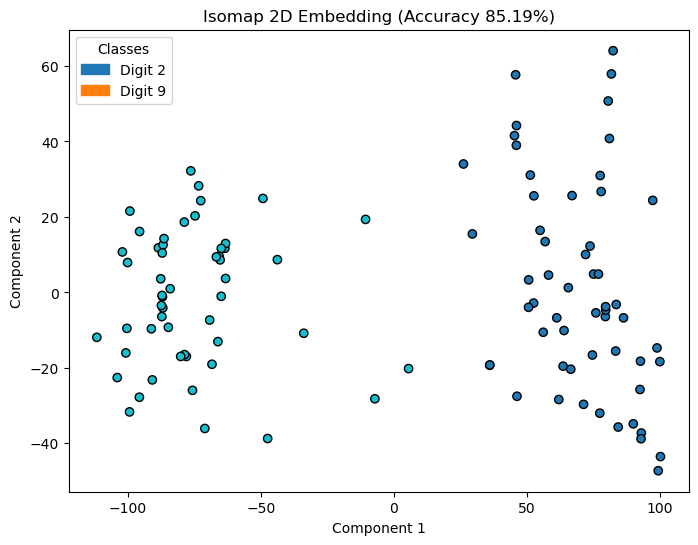

In [10]:
# Plotting
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_test_reduced[:,0], X_test_reduced[:,1], c=y_test, cmap='tab10', edgecolors='k')

# Build the legend using correct color mapping
classes = np.unique(y_test)
colors = [plt.cm.tab10(i / 9) for i in range(len(classes))]
legend_elements = [
    mpatches.Patch(color=colors[i], label=f'Digit {classes[i]}')
    for i in range(len(classes))
]

plt.legend(handles=legend_elements, title="Classes")
plt.title(f"Isomap 2D Embedding (Accuracy {acc:.2%})")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


### Case where n_neighbors = 8, n_components = 5 (do not change)

In [11]:
# Load digits data
digits = load_digits()
X = digits.data
y = digits.target
mask = (y == num1) | (y == num2)
X = X[mask]
y = y[mask]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_reduced = isomap(X_train, n_neighbors=8, n_components=5) # Fit MyIsomap on training data
X_train_reduced = X_train_reduced[~np.isnan(X_train_reduced).any(axis=1)] # Drop NaN values
y_train = y_train[~np.isnan(X_train_reduced).any(axis=1)]

# Concatenate before Isomap
X_all = np.vstack([X_train, X_test])
y_all = np.hstack([y_train, y_test])

# Apply Isomap ONCE
X_all_reduced = isomap(X_all, n_neighbors=8, n_components=5)

# Split back
X_train_reduced = X_all_reduced[:len(X_train)]
X_test_reduced = X_all_reduced[len(X_train):]

# Train classifier
clf = LogisticRegression()
clf.fit(X_train_reduced, y_train)

# Apply isomap separately to test set
X_test_reduced = isomap(X_test, n_neighbors=8, n_components=5)

# Predict
y_pred = clf.predict(X_test_reduced)

# Accuracy
acc = accuracy_score(y_test, y_pred)

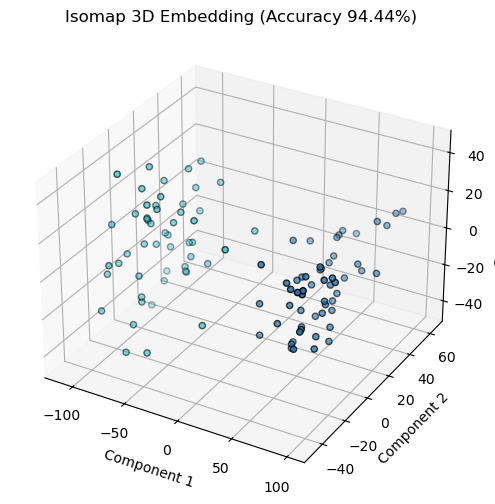

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')  # Set 3D projection

# 3D scatter plot
sc = ax.scatter(X_test_reduced[:,0], X_test_reduced[:,1], X_test_reduced[:,2], c=y_test, cmap='tab10', edgecolors='k')
ax.set_title(f"Isomap 3D Embedding (Accuracy {acc:.2%})")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

## Do you get significant accuracy differences between n_components = 2 and n_components = 5? Why do you think you did/didn't?

### Student Answers Here

Sample Answer: Yes, n_components = 5 performed much better. This makes sense, as more of the significant components from the eigendecomposition can be considered, meaning the model is able to use more of the components it learned that best represent the data.

In [13]:
#plt.scatter(X_test_reduced[:,0], X_test_reduced[:,1], c=y_test, cmap='tab10', edgecolors='k')
#plt.title("Isomap Embedding of Digits 0 and 1")
#plt.show()

## Now to test Isomap with classifying all of the digits (not just 2 of them):

#### What do you think the number easiest to separate from the rest of them will be? What do you think the hardest will be?

##### Student sample answer:

It would be easy to separate 1 because it is a very distinguishable straight line. It would be hard to distinguish 5 because it shares a lot of the same curving patterns as the other numbers.

## DO NOT CHANGE THIS CODE

In [14]:
# Load digits data
digits = load_digits()
X = digits.data
y = digits.target

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_reduced = isomap(X_train, n_neighbors=8, n_components=5) # Fit MyIsomap on training data
X_train_reduced = X_train_reduced[~np.isnan(X_train_reduced).any(axis=1)] # Drop NaN values
y_train = y_train[~np.isnan(X_train_reduced).any(axis=1)]

# Concatenate before Isomap
X_all = np.vstack([X_train, X_test])
y_all = np.hstack([y_train, y_test])

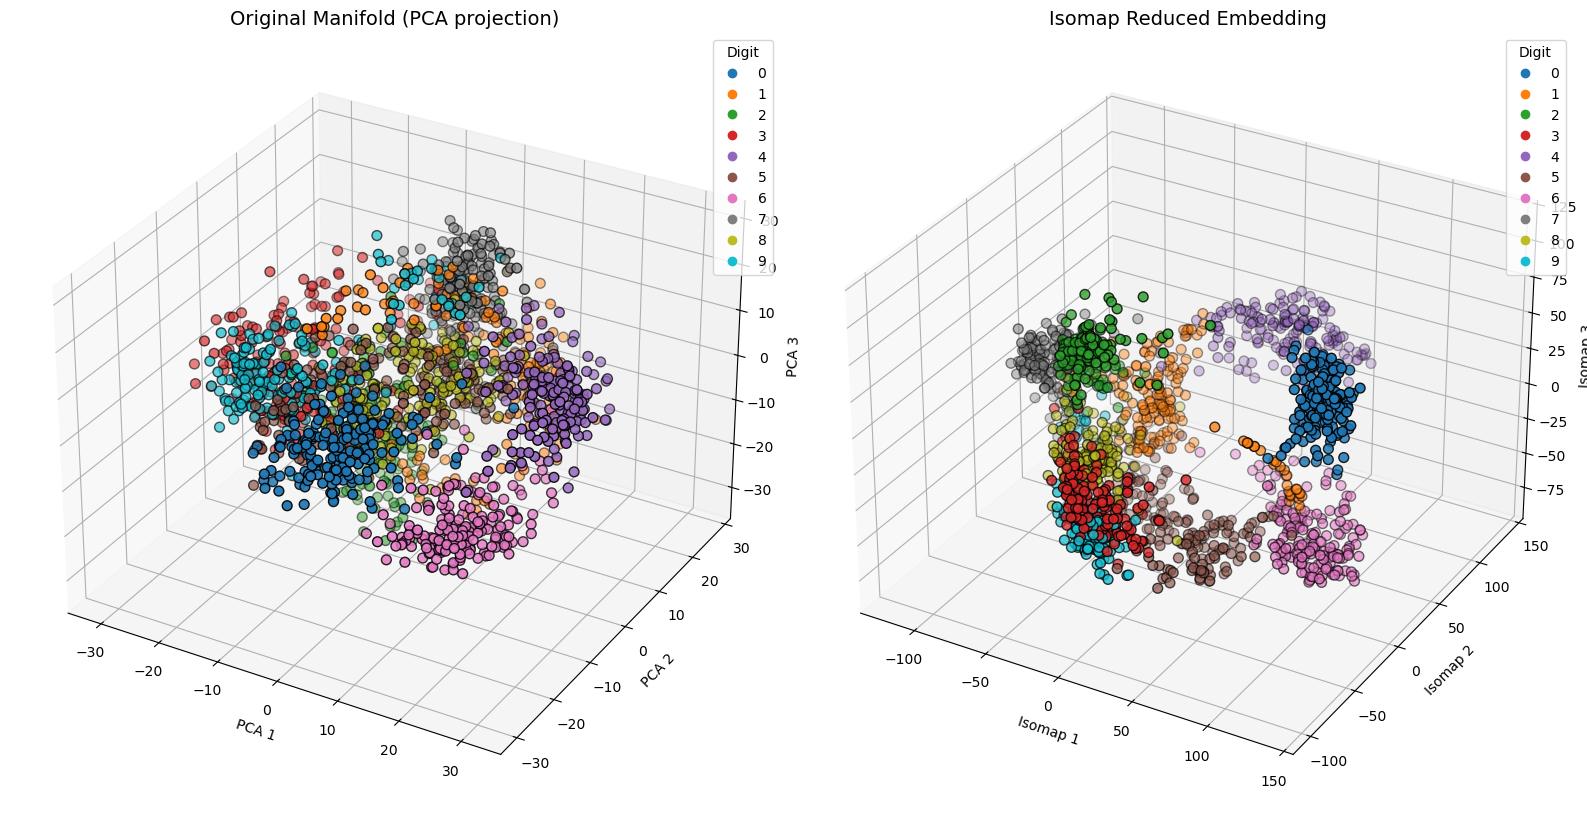

In [15]:
# Project original data with PCA (for visualization only)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_all)

# Apply Isomap to the same data
X_iso = isomap(X_all, n_neighbors=10, n_components=3)

# To plot both side-by-side, use one figure
fig = plt.figure(figsize=(16,8))

# Left: PCA-projected original data
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_all, cmap='tab10', edgecolors='k', s=50)
handles, labels = scatter1.legend_elements()
plt.legend(handles, labels, title="Digit")
ax1.set_title('Original Manifold (PCA projection)', fontsize=14)
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_zlabel('PCA 3')

# Right: Isomap embedding
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_iso[:,0], X_iso[:,1], X_iso[:,2], c=y_all, cmap='tab10', edgecolors='k', s=50)
handles, labels = scatter2.legend_elements()
plt.legend(handles, labels, title="Digit")
ax2.set_title('Isomap Reduced Embedding', fontsize=14)
ax2.set_xlabel('Isomap 1')
ax2.set_ylabel('Isomap 2')
ax2.set_zlabel('Isomap 3')

plt.tight_layout()
plt.show()


## In case you want to be able to view the difference between PCA and Isomap more closely, here's code to make a GIF of rotating around each 3D plot.
## You need to uncomment it. It is commented out by default, and you are not expected to run it in your submission.

In [16]:
"""
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# NOTE: The following line changes the amount of RAM that can be allocated towards the animation.
# This sets it from 20MB (default) to 50MB. You might need 50MB to see the full animation.
# However, note that this may make the animation take much longer to generate.
# plt.rcParams['animation.embed_limit'] = 50 * 1024 * 1024

# Function to update the rotation for the animation
def update_view(num, ax1, ax2):
    # Rotate the view
    ax1.view_init(elev=30., azim=num)
    ax2.view_init(elev=30., azim=num)

# Create animation
ani = FuncAnimation(fig, update_view, frames=np.arange(0, 360, 1), fargs=(ax1, ax2), interval=50)

# Display the animation in Jupyter
HTML(ani.to_jshtml())

# Optionally, you can also save it as a GIF if you'd like:
# ani.save('isomap_rotation.gif', writer='imagemagick', fps=30)
"""

"\nfrom IPython.display import HTML\nfrom matplotlib.animation import FuncAnimation\n\n# NOTE: The following line changes the amount of RAM that can be allocated towards the animation.\n# This sets it from 20MB (default) to 50MB. You might need 50MB to see the full animation.\n# However, note that this may make the animation take much longer to generate.\n# plt.rcParams['animation.embed_limit'] = 50 * 1024 * 1024\n\n# Function to update the rotation for the animation\ndef update_view(num, ax1, ax2):\n    # Rotate the view\n    ax1.view_init(elev=30., azim=num)\n    ax2.view_init(elev=30., azim=num)\n\n# Create animation\nani = FuncAnimation(fig, update_view, frames=np.arange(0, 360, 1), fargs=(ax1, ax2), interval=50)\n\n# Display the animation in Jupyter\nHTML(ani.to_jshtml())\n\n# Optionally, you can also save it as a GIF if you'd like:\n# ani.save('isomap_rotation.gif', writer='imagemagick', fps=30)\n"

### Did PCA or Isomap classification do a better job separating between the digits? Evaluate this qualitatively based on the 3D scatter plots. Also, if one of the models had better distinctions between digits, explain why you think that occurred.

### Was there any particular number that Isomap did a good or bad job distinguishing between?

### What do you think some benefits of using ISOMAP, a dimensionality reduction method preserving distances, are compared to using something like principal component analysis (PCA), which focuses on preserving variance?

Sample student answers:

Isomap performed better, as there is more distance between the clusters. This was likely because digits aren't mainly distinguishable based on a linear embedding. For example, the number 1 is still the number 1, even if someone writes it slightly to the left or right of the center. However, PCA doesn't know this, and might try to find value in where the 1 is written, leading to less significant distinctions being able to be made.

Isomap did a good job identifying 0s, shown by their very separate cluster. Isomap did not do as well with 1s (surprisingly), shown by the split of the cluster across the center.

Preserving distances through Isomap is important because when classifying, we're trying to determine how different the way numbers are written are. So as a result, even if handwriting is sloppy, we don't want to capture how sloppy a number is written (which would be recorded through *variance*, which PCA aims to preserve), as we still want a sloppily written "2" to be treated the same as a neatly written "2". However, if we have sloppily written 2s and 3s, we don't want to confuse them just because they may have similar variance. The fact that Isomap would emphasize the difference between them despite having possibly similar variances would make it better than linear methods for this kind of classification.